In [68]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("knn.csv")

df

,Height,Weight,Class
0,167,51,Underweight
1,182,62,Normal
2,176,69,Normal
3,173,64,Underweight
4,172,65,Normal
5,174,56,Underweight
6,169,58,Normal
7,173,57,Normal
8,170,55,Underweight
9,170,57,Normal


In [70]:
# Separate X and y data

X = df.drop('Class', axis=1)
y = df['Class']

In [73]:
# Calculate distance between two points

def euclidean_distance(a, b):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate Euclidean distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**2
    return distance**(1/2)


# Test the function

euclidean_distance(a=X.iloc[0], b=X.iloc[9])

6.708203932499369

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:

def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=2)

print(y_hat_test)

['Normal', 'Underweight', 'Underweight']


In [76]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.3333333333333333


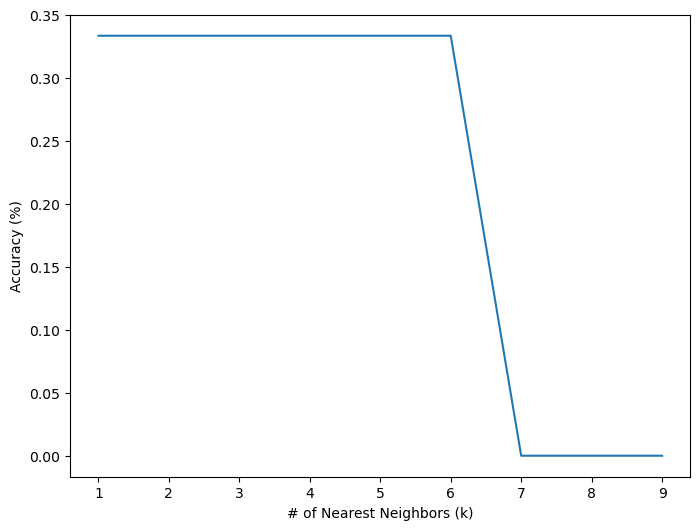

In [77]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,10):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,10), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');